# Диаграммы

На прошлом занятии мы с вами рассмотрели функционал библиотеки Matplotlib для визуализации графиков функций вида $y = f(x)$ и для построения диаграмм рассеяния. Изученные виды визуализаций хорошо подходят для работы с числовыми данными: для визуализации различных аппроксимаций, визуализации экспериментальных данных и построения трендов. Однако изученные виды визуализаций не очень хорошо подходят для построения распределений данных. Задача визуализации распределения данных является достаточно важной частью *разведывательного анализа данных*. Разведывательный анализ данных, в свою очередь, является важным шагом при проведении статистических исследований и при работе с данными в целом. Во многом именно от результатов этого шага зависит качество выдвигаемых гипотез и ход дальнейшего исследования. Следовательно, необходим инструментарий для визуализации распределения данных. Именно с ним мы сегодня и познакомимся.

**Необходимые импорты:**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

**Подготовительные шаги:**

In [3]:
plt.style.use("ggplot")
np.random.seed(42)

## Визуализация категориальных данных

Нередко данные, с которыми приходится иметь дело, являются категориальными. Т.е. область значений элементов выборки представляет собой некоторое множество с конечным числом элементов, которое не описывается непрерывной числовой функцией. Обычно, число элементов в этом множестве невелико. Каждый элемент области значений характеризует некоторый класс объектов реального мира. Категориальные данные очень часто встречаются в различных статистических опросах. Например, к категориальным данным относятся пол и группа крови респондентов.

Визуализации распределений категориальных данных, полученных в ходе статистических опросов, является достаточно важной задачей. На основе полученных визуализаций осуществляется анализ собранных данных, выдвигаются различные статистические гипотезы, формулируются тренды, которые влияют на дальнейший ход работы. Возвращаясь к примеру с полом респондентов, можно сказать, что построение полового распределения респондентов позволяет уточнить целевую аудиторию продукта и скорректировать его дальнейшее развитие.

Обсудив актуальность задачи визуализации категориальных данных, перейдем к практике.

### Круговые диаграммы

Один из возможных способов визуализации категориальных данных - круговая диаграмма. Круговая диаграмма - наглядный способ визуализации распределения категориальных данных. Круговая диаграмма представляет собой круг, разбитый на сектора разного цвета. Каждый сектор соответствует некоторому элементу из области значений. Размер сектора зависит от количества элементов данных с данным значением. Для построения круговых диаграмм в Matplotlib используется функция `plt.pie`. 

Рассмотрим пример и построим простейшую круговую диаграмму распределений респондентов по полу.

In [4]:
# создадим данные ответов респондентов
genders = np.random.choice(["men", "women"], size=200, p=[0.7, 0.3])

# посчитаем количество респондентов разного пола
labels, counts = np.unique(genders, return_counts=True)

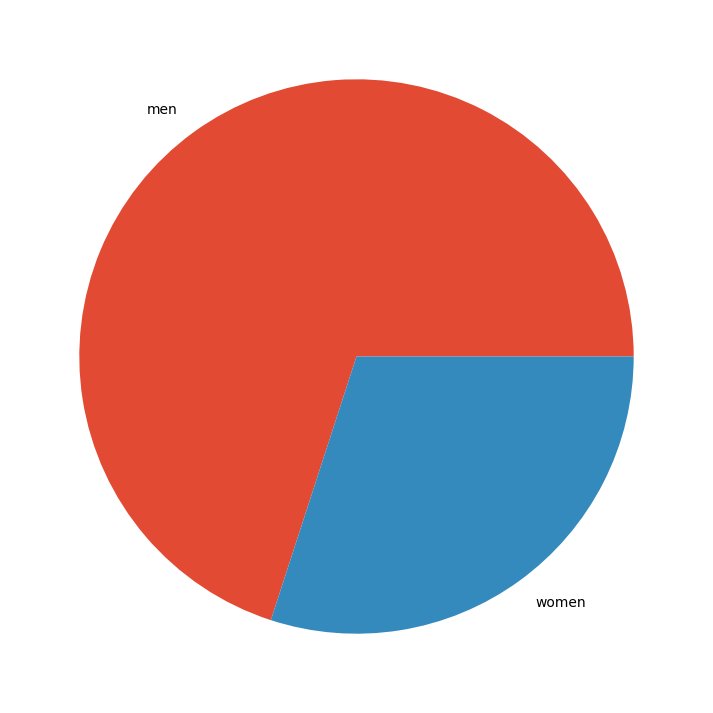

In [5]:
# построим круговую диаграмму
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.pie(counts, labels=labels)
plt.show()

Как видно из этого примера, чтобы получить информативную круговую диаграмму, нам всего лишь потребовалось рассчитать размер каждого сектора круга (количество человек данного пола) и получить метки классов. Однако данная диаграмма не является эталонной, и пока что не годится для использования в отчетах или в качестве слайдов презентации для какой-либо конференции. Давайте рассмотрим дополнительные возможности функции `pie` и улучшим нашу диаграмму.

Начнем с цветов. По умолчанию Matplotlib использует достаточно яркие цвета. Давайте сделаем более нежную, пастельную цветовую гамму, которая не напрягала бы глаза зрителей так сильно, как это происходит сейчас. Чтоб сделать это, нам достаточно передать массив цветов в качестве значения аргумента `colors`. Причем количество цветов может не соответствовать числу секторов круга. В случае, если количество цветов меньше, чем число секторов диаграммы, Matplotlib будет циклически перебирать переданные значения, а на диаграмме окажутся сектора с одинаковыми цветами. В случае, если количество цветов больше, чем количество секторов, Matplotlib будет использовать первые $N$ цветов, где $N$ - число секторов.

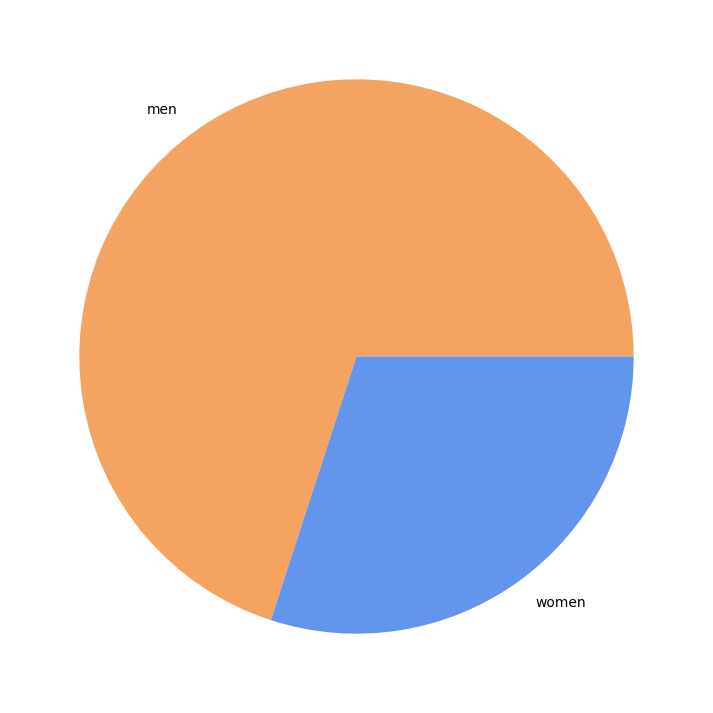

In [6]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.pie(counts, labels=labels, colors=["sandybrown", "cornflowerblue"])
plt.show()

Теперь цвета не такие яркие, и нам легче смотреть на построенную диаграмму. Однако из-за контрастности цветов граница секторов все равно будет напрягать глаза. Для того, чтобы избежать это, создадим пространство между секторами, сместив их немного от центра круга и, как следствие, друг относительно друга. За смещение секторов отвечает аргумент `explode`, значение которого является массивом положительных чисел с плавающей точкой - смещения секторов относительно центра. Размер массива должен соответствовать числу секторов на диаграмме.

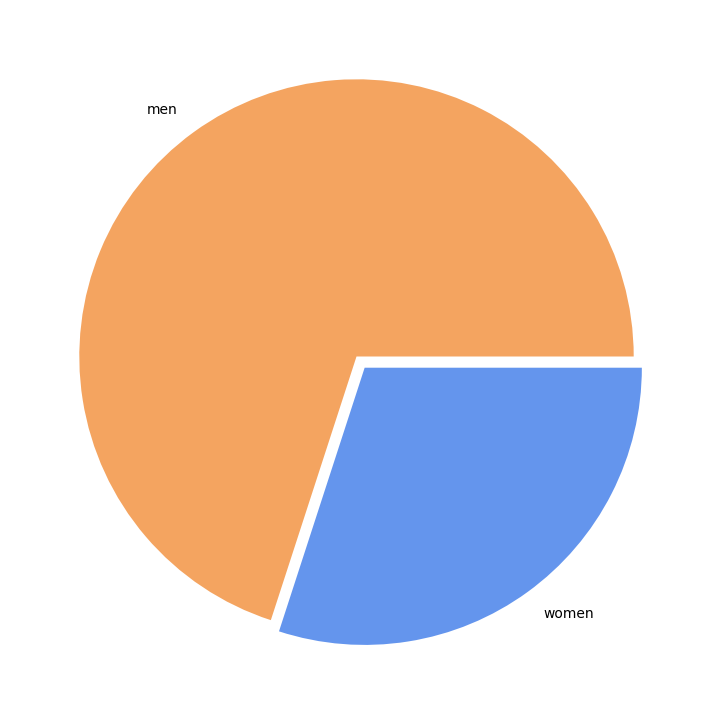

In [7]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.pie(
    counts,
    explode=[0, 0.05],
    labels=labels,
    colors=["sandybrown", "cornflowerblue"],
)
plt.show()

Добавим еще одну модификацию, которая сделает нашу диаграмму привлекательнее - тень.

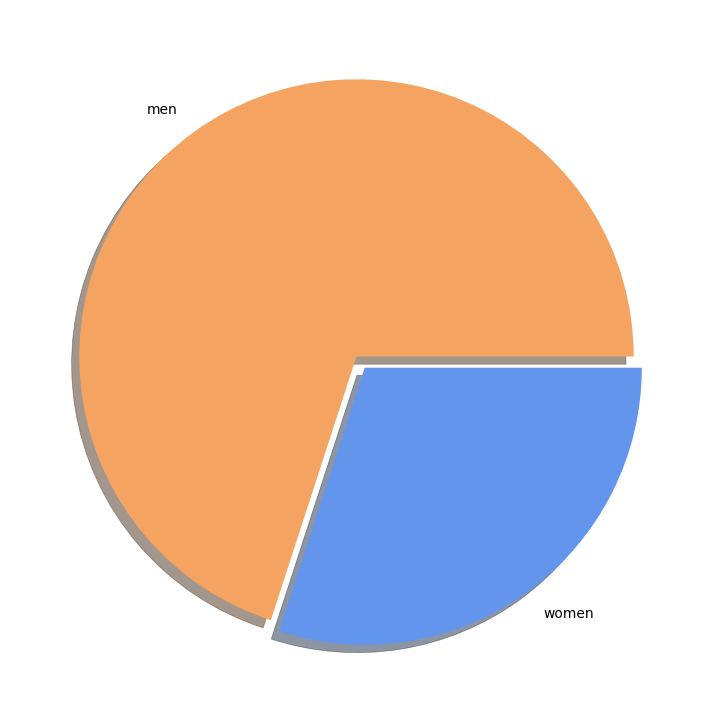

In [8]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.pie(
    counts,
    explode=[0, 0.05],
    labels=labels,
    colors=["sandybrown", "cornflowerblue"],
    shadow=True,
)
plt.show()

Теперь поработаем с текстом. Начнем с того, что вынесем метки секторов в отдельную сущность - легенду. С ней мы познакомились на прошлом занятии. Также добавим название диаграммы с помощью функции `set_title`, также знакомой нам с прошлого занятия.

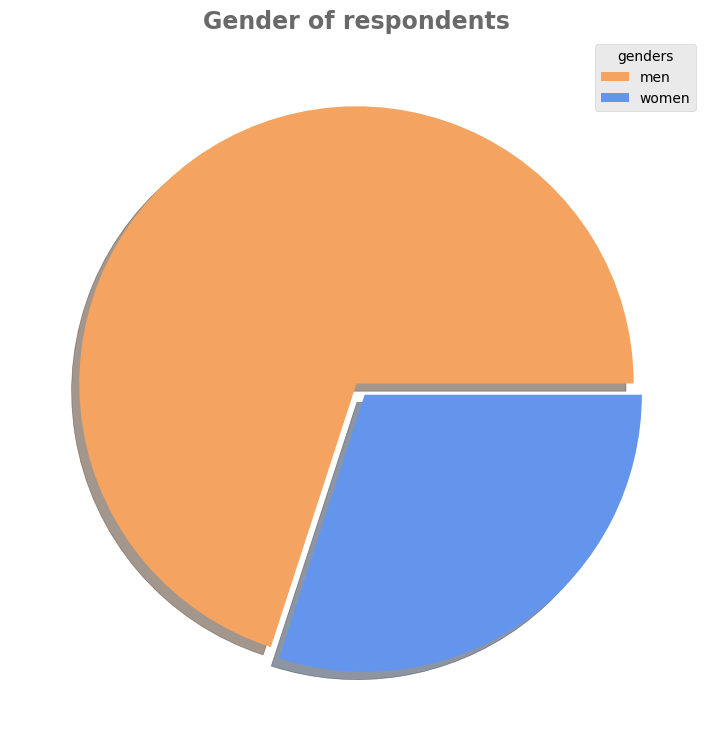

In [9]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.set_title("Gender of respondents", fontsize=17, fontweight="bold", c="dimgray")
wedges, _ = axis.pie(
    counts,
    explode=[0, 0.05],
    colors=["sandybrown", "cornflowerblue"],
    shadow=True,
)
axis.legend(wedges, labels, title="genders")

plt.show()

Обратите внимание, что в этом примере мы не передаем метки явно во время вызова `pie`. Вместо этого мы используем результат выполнения функции для формирования легенды. Результат выполнения функции `pie` -  кортеж со списком секторов круговой диаграммы и списком текстов, связанных с секторами. Для построения легенды нам нужны только сектора диаграммы, поэтому мы сохраняем только первый элемент результирующего кортежа, связав его с переменной `wadges` (англ. *клинья*). После этого мы передаем в функцию `legend()` явным образом объекты для аннотирования и их целевые метки. Также мы подписываем саму легенду, присваивая ей название `title="genders"`. Такой подход к построению легенды может быть полезен в том случае, когда вам нужно четко указать, какие объекты должны присутствовать на ней, а какие нет. Подобной гибкости не добиться  путем простого использования аргумента `labels` функции визуализации. Именно такой случай и был проиллюстрирован, поскольку использование аргумента `lables` в нашем случае создаст метки в двух местах одновременно: рядом с самими секторами, как это было в предыдущих примерах, и в самой легенде.

Сейчас наша диаграмма близка к репрезентативному виду, однако не хватает некоторой дополнительной информации о размере секторов. Не лишним будет указать какой процент данных приходится на каждый сектор, или сколько респондентов соответствует каждому сектору диаграммы. Чтобы добавить подписи для секторов, воспользуемся аргументами `autopct` и `textprops`. Первый аргумент принимает на вход строку для форматирования или функцию форматирования текста. Аргумент функции - число процентов, соответствующее данному сектору. Функция будет вызвана для каждого сектора отдельно. С помощью второго аргумента можно отформатировать текст подписей, настроив размер шрифта, или его цвет.

In [10]:
# создадим вспомогательную функцию форматирования
def convert_percent_to_label_str(
    percent: float, general_amount: int
) -> str:
    amount = int(np.round(percent / 100 * general_amount))
    return f"{amount:d} people\n({percent:.1f}%)"

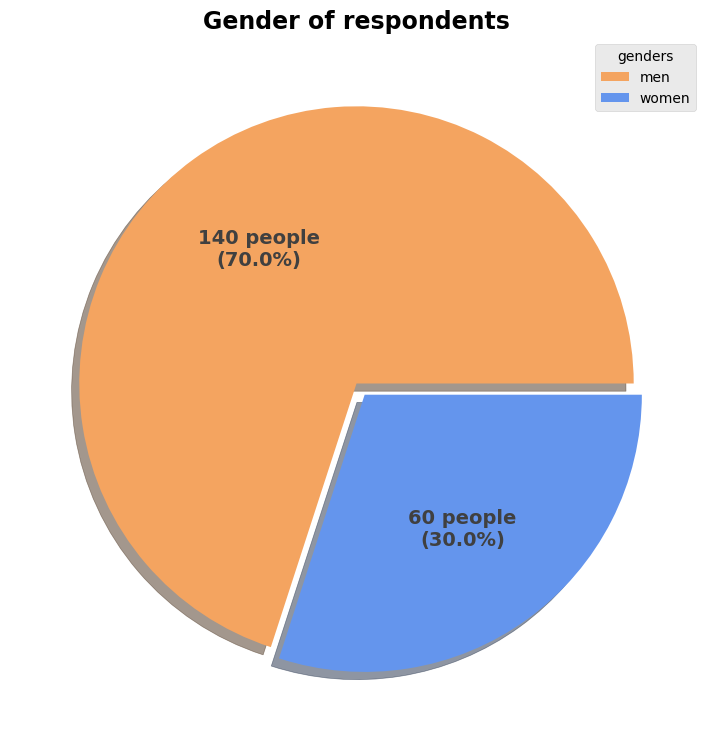

In [16]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.set_title("Gender of respondents", fontsize=17, fontweight="bold", c="k")
wedges, _, _ = axis.pie(
    counts,
    explode=[0, 0.05],
    autopct=lambda pct: convert_percent_to_label_str(pct, genders.size),
    colors=["sandybrown", "cornflowerblue"],
    shadow=True,
    textprops=dict(size=14, weight="bold", color="0.25"),
)
axis.legend(wedges, labels, title="genders")

plt.show()

На этом базовая настройка круговой диаграммы подходит к концу. Если у вас возникнет необходимость в более детальной настройке диаграммы, вы всегда можете обратиться к [официальной документации](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html).

### Столбчатые диаграммы

Еще один вид диаграмм, который хорошо подходит для визуализации категориальных данных - это столбчатые диаграммы. Столбчатые диаграммы представляют собой набор столбцов, каждый из которых соответствует определенной группе данных. Высота столбца зависит от количества элементов с определенным значением. Для построения столбчатых диаграмм в Matplotlib можно использовать функцию `bar`.

Давайте также построим столбчатую диаграмму с использованием наших данных о поле респондентов, а потом попытаемся ее улучшить.

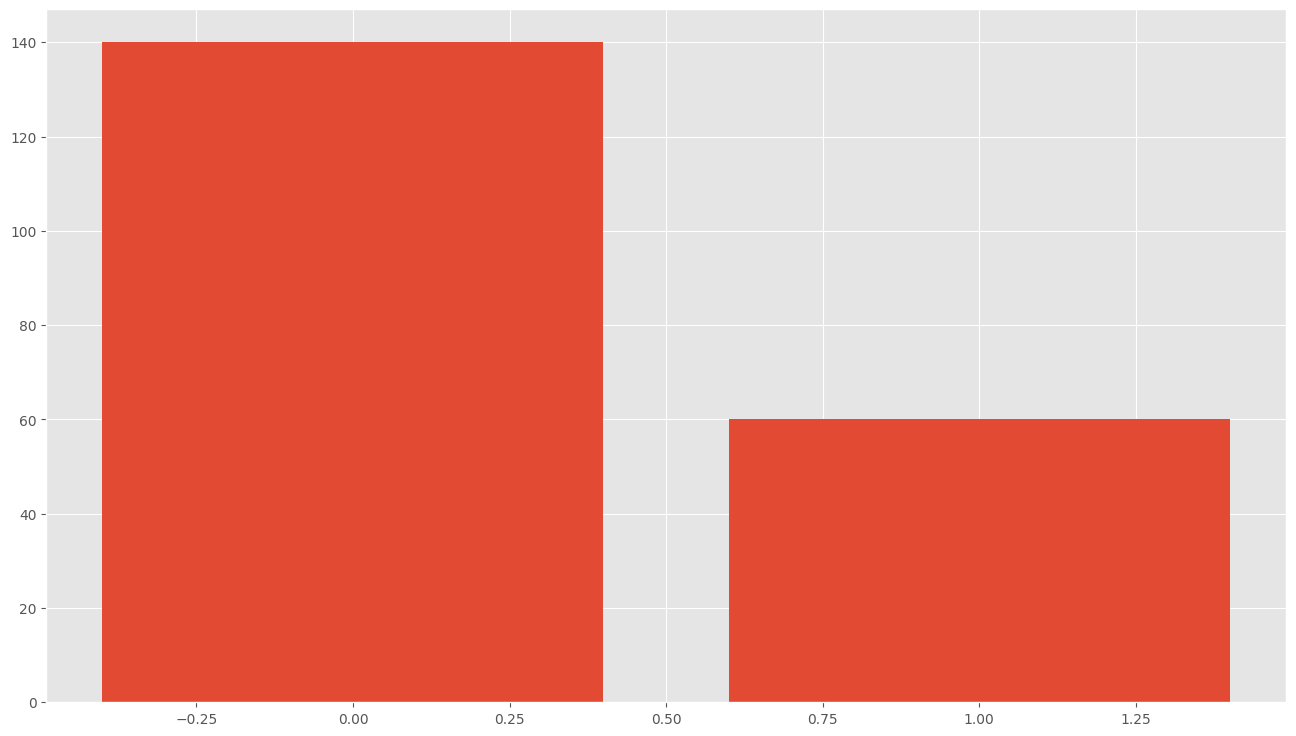

In [17]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes

axis.bar(np.arange(counts.size), counts)
plt.show()

В простейшем случае для построения простой столбчатой диаграммы нам достаточно указать расположение столбцов и их высоты. Однако, как и в случае с `plt.pie`, простейшая форма столбчатой диаграммы выглядит не самым лучшим образом для использования в различных отчетах. Давайте исправим это.

Как и в прошлый раз начнем с цвета. В качестве цвета можно указать как одно значение - в этом случае все столбцы будут окрашены в один цвет, так и список значений, задающий цвет для каждого столбца по-отдельности. Также настроим цвет контура столбцов с помощью параметра `edgecolor`.

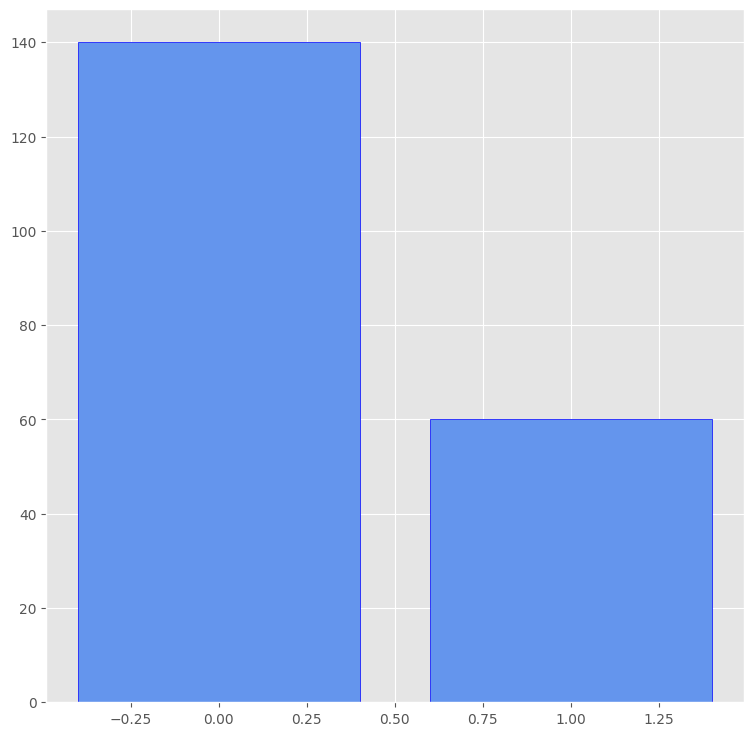

In [18]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.bar(
    np.arange(counts.size),
    counts,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

Обратим внимание, что по умолчанию ширина столбцов равна 0.8 единицам. В нашем случае это слишком много, поэтому столбцы выглядят как слишком широкие прямоугольники. Настроить ширину столбцов можно с помощью параметра `width`. Причем в качестве значения вы можете передать как число с плавающей точкой - в этом случае указанная ширина будет использована для построения всех столбцов, так и список чисел с плавающей точкой, указав ширину каждого столбца по-отдельности. Для сохранения единообразия элементов нашей визуализации воспользуемся первым вариантом.

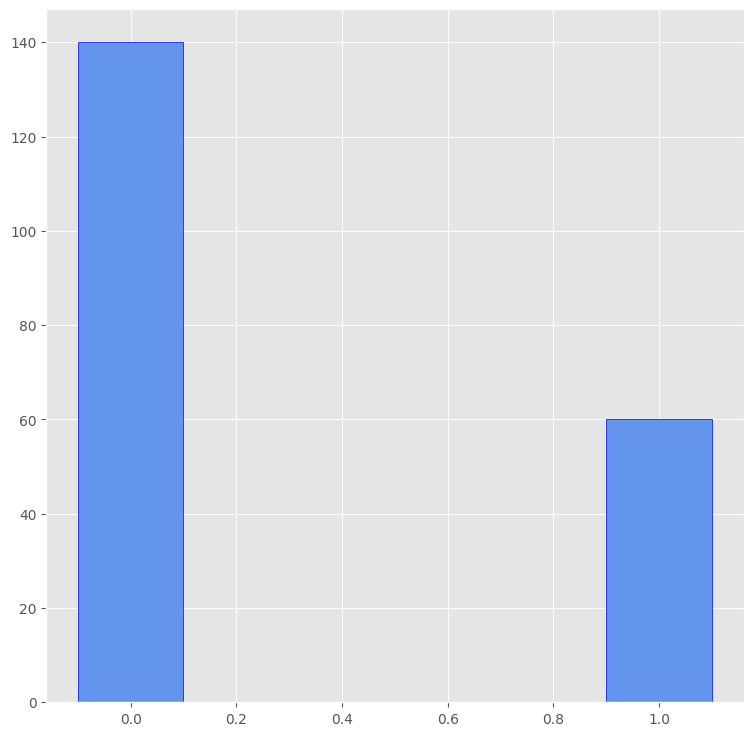

In [20]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.bar(
    np.arange(counts.size),
    counts,
    width=0.2,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

Теперь остается добавить подписи на наш график. Название, как и в прошлый раз, зададим с помощью функции `set_title`. Для именования столбцов воспользуемся функцией `xticks`, которая позволяет задать отображаемые деления оси абсцисс, а также настроить их метки. Отдельные свойства делений настроим через `tick_params`.

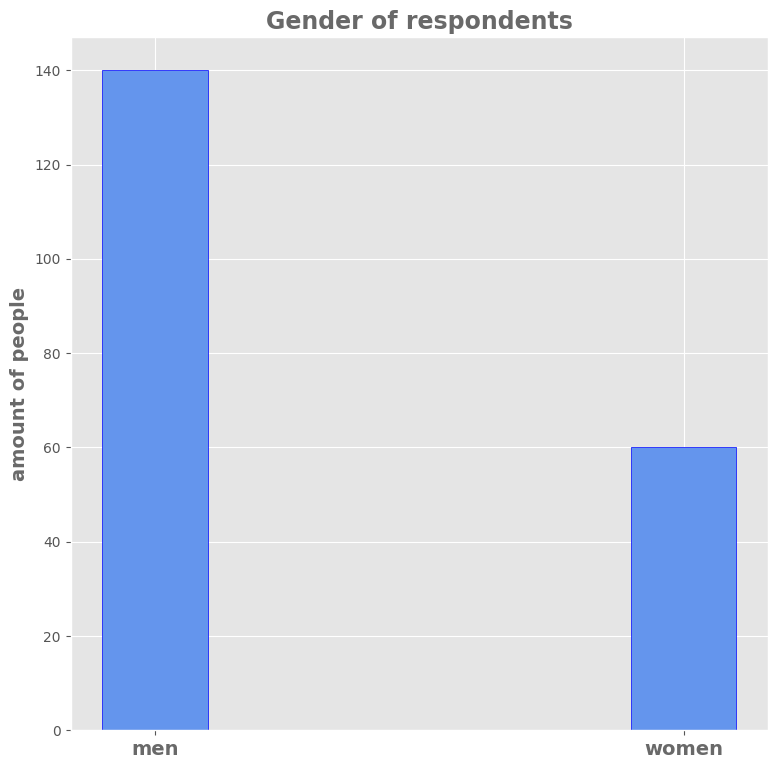

In [22]:
figure, axis = plt.subplots(figsize=(9, 9))
axis: plt.Axes

axis.set_title("Gender of respondents", fontsize=17, fontweight="bold", c="dimgray")
axis.set_ylabel("amount of people", fontsize=14, fontweight="bold", c="dimgray")
axis.set_xticks(
    np.arange(labels.size),
    labels=labels,
    weight="bold",
)
axis.tick_params(axis="x", labelsize=14, labelcolor="dimgray")

axis.bar(
    np.arange(counts.size),
    counts,
    width=0.2,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

С остальными настройками столбчатой диаграммы можно ознакомиться [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

## Визуализация распределений числовых данных

Построение диаграмм может быть полезно не только при работе с категориальными данными, но и при работе с числовыми данными. При работе с числовыми данными, полученными в ходе различных статистических опросов, часто необходимо строить диаграммы их распределения.  Визуализация распределения числовых данных может быть полезна для построения оценки плотности распределения данных или для идентификации и устранения выбросов. Рассмотрим некоторые инструменты для визуализации распределений числовых данных в Matplotlib.

### Гистограммы

Одним из самых простых инструментов визуализации распределения числовых данных является гистограмма. Гистограмма похожа на столбчатую диаграмму. Обычно столбцы гистограммы имеют одинаковую ширину, соответствующую ширине некоторого интервала значений. Высота конкретного столбца зависит от количества данных, значения которых лежат в интервале значений, соответствующих данному столбцу. Для построения гистограмм в Matplotlib используется функция `plt.hist`.

В простейшем случае построение гистограммы будет выглядеть следующим образом:

In [23]:
data = np.random.normal(size=1000)

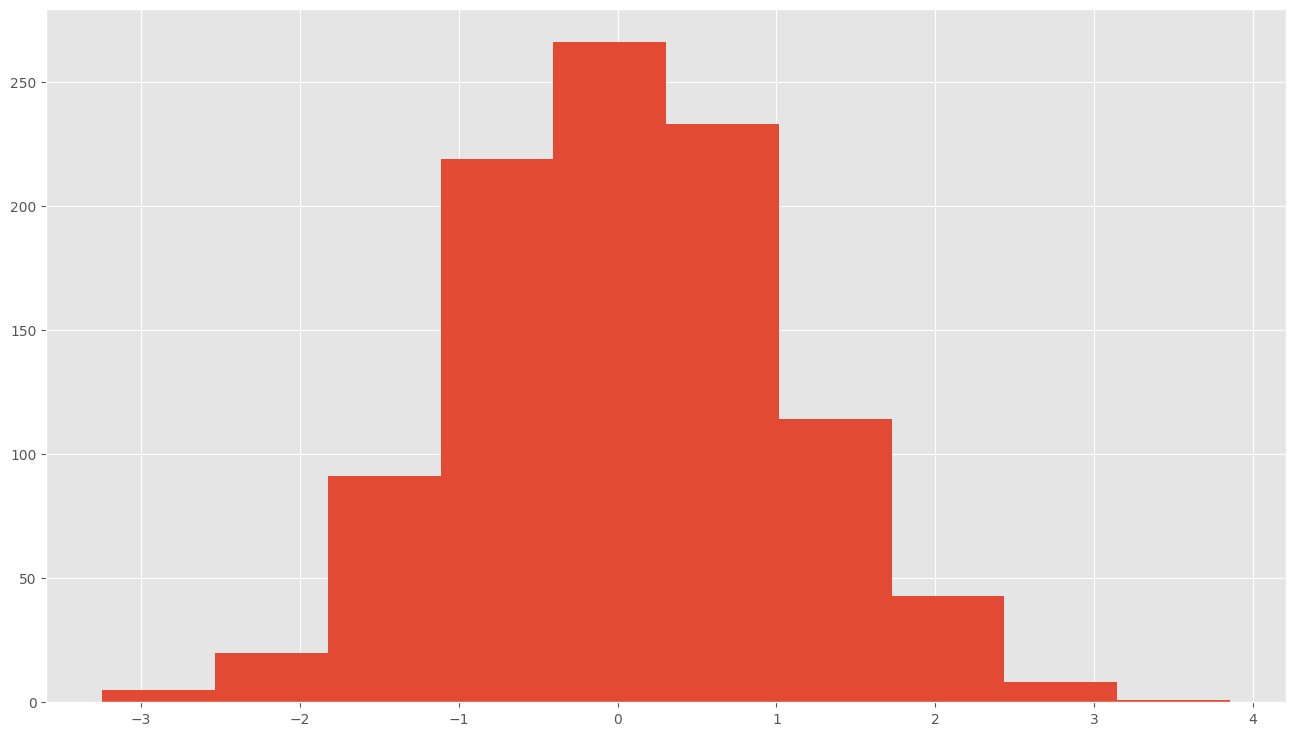

In [24]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes

axis.hist(data)
plt.show()

Настройки гистограмм похожи на настройки столбчатых диаграмм. Настроим цвета столбцов и их контуров с помощью знакомых нам параметров `color` и `edgecolor`.  Также увеличим количество столбцов за счет увеличения числа интервалов разбиения до 50 с помощью параметра `bins`, значение которого по умолчанию равно 10.

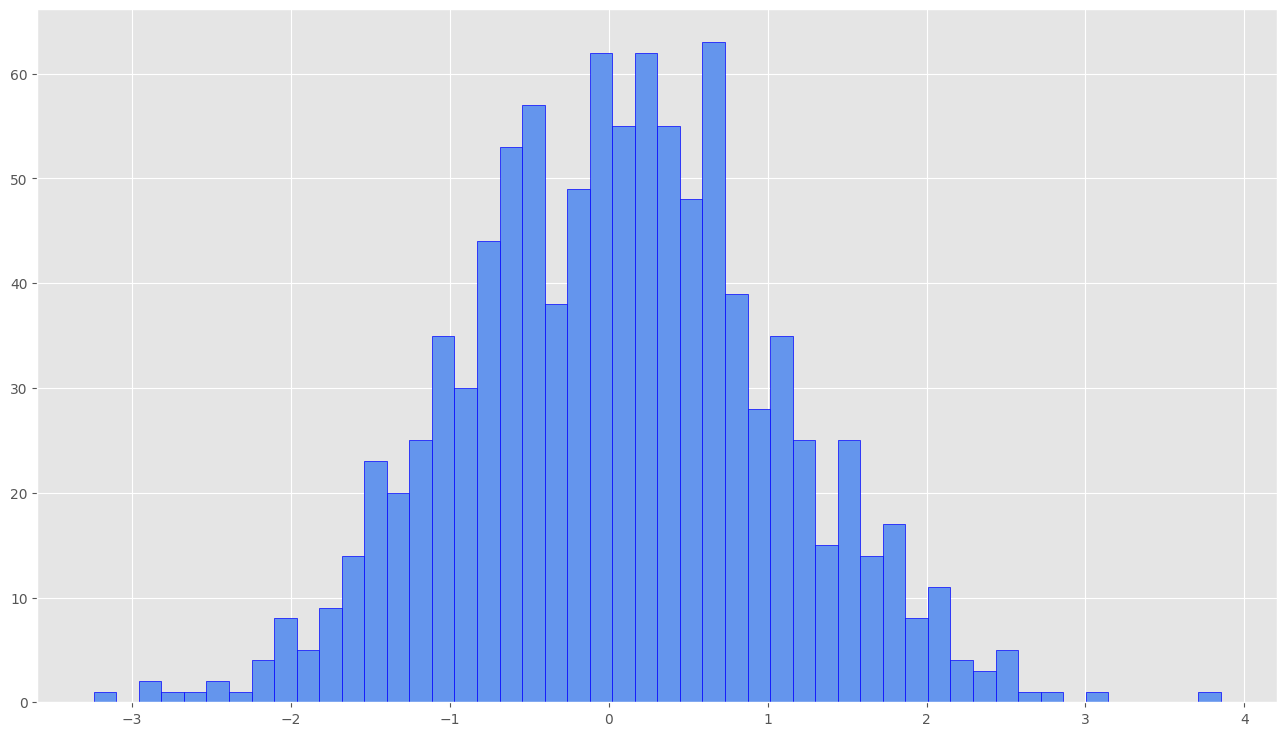

In [25]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes

axis.hist(
    data,
    bins=50,
    color="cornflowerblue",
    edgecolor="blue",
)
plt.show()

Как можно видеть по единицам измерения оси ординат, высоты столбцов выражены количеством элементов, попавших в соответствующие им интервалы. В статистическом анализе бывает полезно нормализовать высоту столбцов с учетом общего числа данных. После нормировки полученная гистограмма может выступать в роли плотности вероятностного распределения данных. Для нормализации гистограммы в функции `hist` есть параметр `density` (англ. *плотность*).

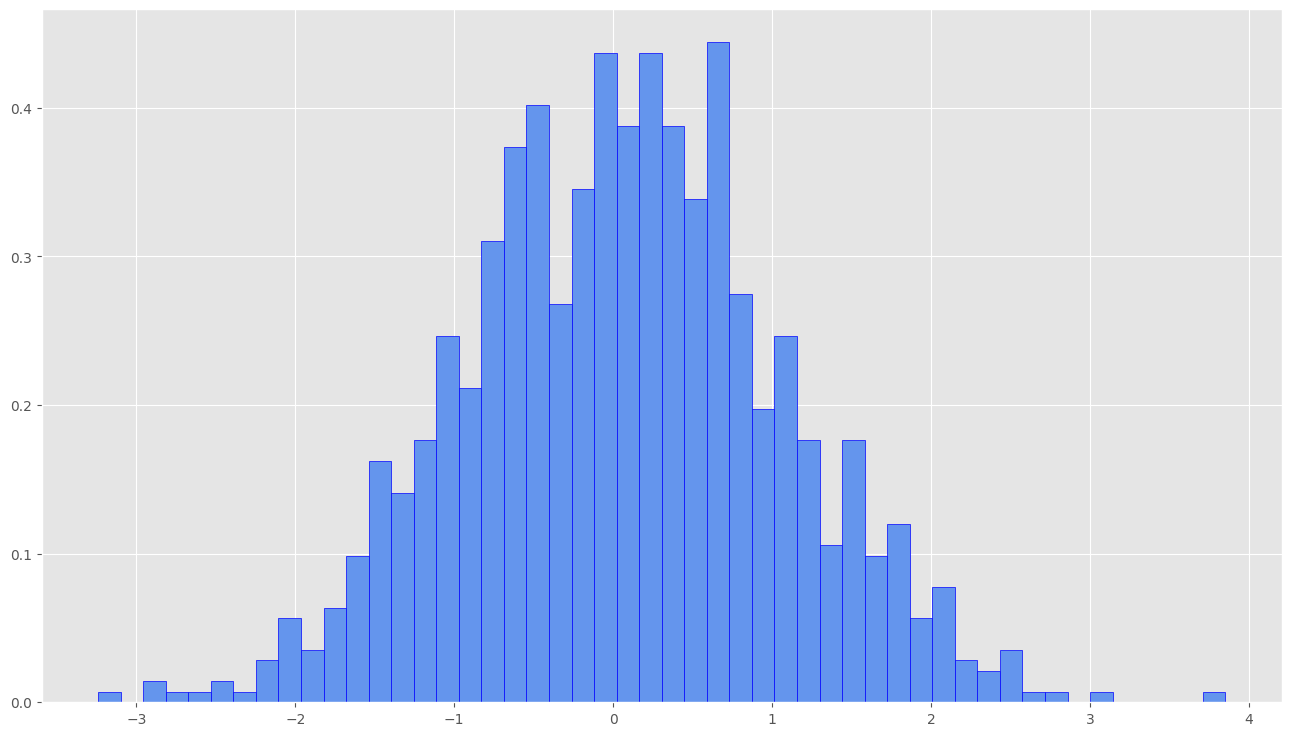

In [26]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes

axis.hist(
    data,
    bins=50,
    color="cornflowerblue",
    edgecolor="blue",
    density=True,
)
plt.show()

Также гистограмму можно визуализировать в кумулятивной форме. Т.е. таким образом, что высота очередного столбца будет равна сумме высот всех предыдущих столбцов и данного столбца. Эта возможность также может быть использована для получения оценки функции распределения вероятностей данных. Чтобы визуализировать гистограмму данным образом, необходимо передать соответствующее булево значение в параметр `cumulative`.

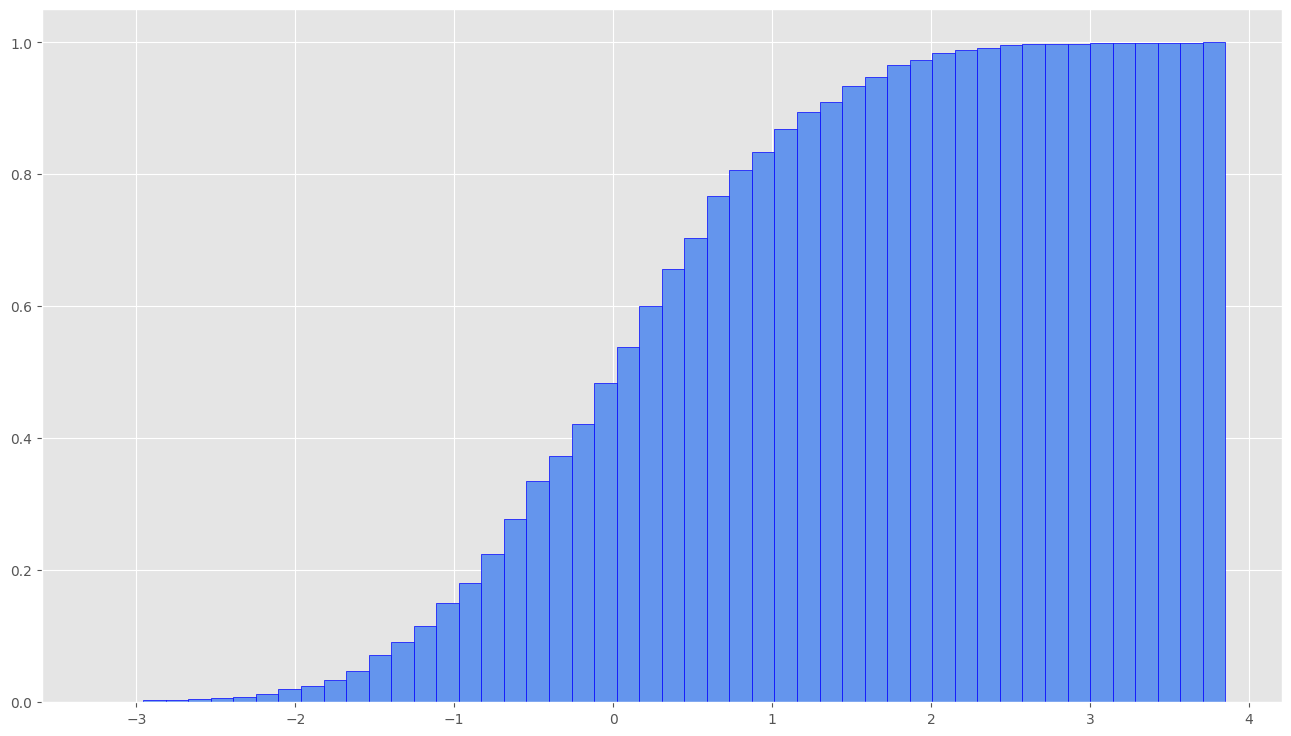

In [27]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes

axis.hist(
    data,
    bins=50,
    color="cornflowerblue",
    edgecolor="blue",
    density=True,
    cumulative=True,
)
plt.show()

Также иногда может возникать необходимость в визуализации нескольких гистограмм одновременно на одних и тех же координатных осях. Однако, в силу особенностей Matplotlib, каждый следующий объект рисуется поверх предыдущего, и одна гистограмма может перекрыть другу. Чтобы этого избежать, существует настройка прозрачности гистограммы с помощью параметра `alpha`.

Рассмотрим пример. Мы получили некоторые данные о средних суточных температурах в разных регионах, и хотим понять, находятся ли эти географические регионы в одной климатической зоне или нет. Это можно сделать, сравнив распределения между собой. Обычно такое сравнение стоит начать с простого визуального анализа, поскольку по его результатам можно сделать вывод о целесообразности дальнейших расчетов.

In [28]:
data_hot_climate = np.random.normal(size=1000, loc=0, scale=5)
data_cold_climate = np.random.normal(size=1000, loc=-10, scale=2)
bins_amount = 100

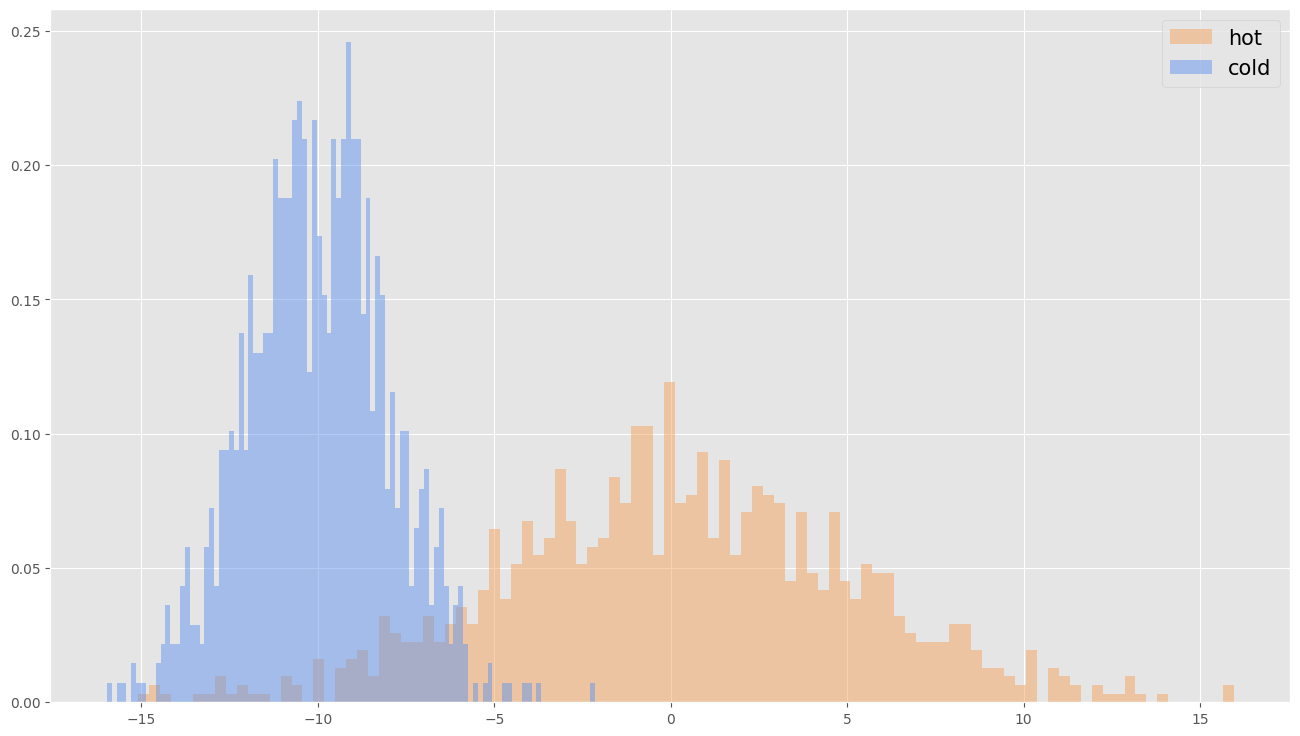

In [29]:
figure, axis = plt.subplots(figsize=(16, 9))
axis: plt.Axes

axis.hist(
    data_hot_climate,
    bins=bins_amount,
    color="sandybrown",
    density=True,
    label="hot",
    alpha=0.5,
)
axis.hist(
    data_cold_climate,
    bins=bins_amount,
    color="cornflowerblue",
    density=True,
    label="cold",
    alpha=0.5,
)
axis.legend(fontsize=15)

plt.show()

Как видим, гистограммы сильно отличаются друг от друга.

### Ящик с усами

Гистограмма может многое сказать нам о распределении данных. Однако из гистограммы тяжело извлечь данные о квартилях, медиане и выбросах. Иначе говоря, гистограмма не очень хорошо справляется с исчерпывающим описанием выборки. Гораздо лучше с этой функцией может справиться диаграмма `boxplot`, или как ее называют в русскоязычной литературе, "ящик с усами" или "диаграмма с усиками". Выглядит она следующим образом:

In [30]:
data = np.random.normal(size=1000)

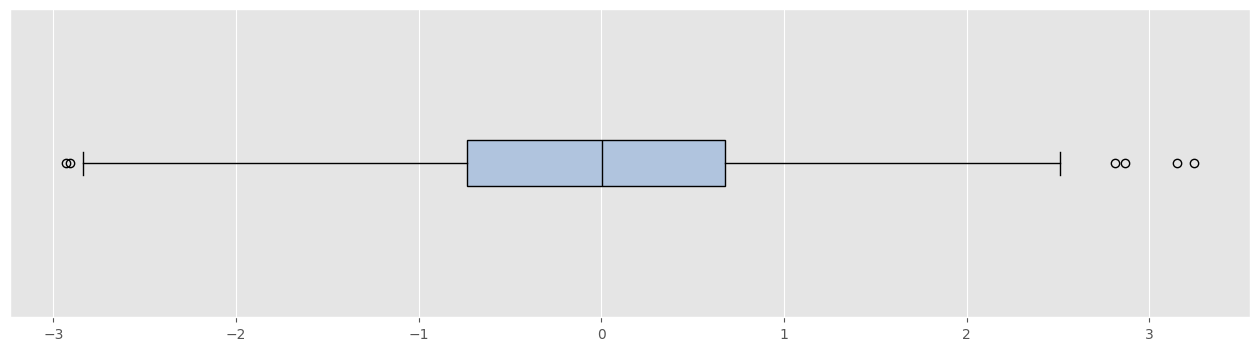

In [31]:
figure, axis = plt.subplots(figsize=(16, 4))
axis: plt.Axes

axis.boxplot(
    data,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightsteelblue"),
    medianprops=dict(color="k"),
)
axis.set_yticks([])
plt.show()

Ящик с усами стоит интерпретировать следующим образом:

- В самом прямоугольнике, который называется ящиком, находится 50% всей выборки, значения попавшие в ящик лежат в диапазоне между 1 и 3 квартилю;
- Черная вертикальная полоса в ящике расположена в значении, соответствующем медиане входных данных;
- Усики - это коридор допустимых значений, который простирается на полторы разницы между значением третьей и первой квартили вправо и влево;
- Точками обозначены выбросы, т.е. те значения данных, которые потенциально могут давать неточность в наших дальнейших вычислениях. 

Подробнее со всеми настройками `boxplot` можно ознакомиться [здесь](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html). Прочитать про саму диаграмму с усиками и правила ее построения можно [тут](https://en.wikipedia.org/wiki/Box_plot).

### Скрипичные диаграммы

Еще один достаточно информативный вид диаграмм - это скрипичная диаграмма. Она является своего рода комбинацией ящика с усами  и гистограммы. Подобно диаграмме с усиками скрипичная диаграмма позволяет отобразить некоторые численные характеристики выборки, например, медиану, и подобно гистограмме скрипичная диаграмма позволяет отобразить форму распределения данных. Рассмотрим пример построения данной диаграммы в Matplotlib. 

In [32]:
data = np.random.normal(size=1000)

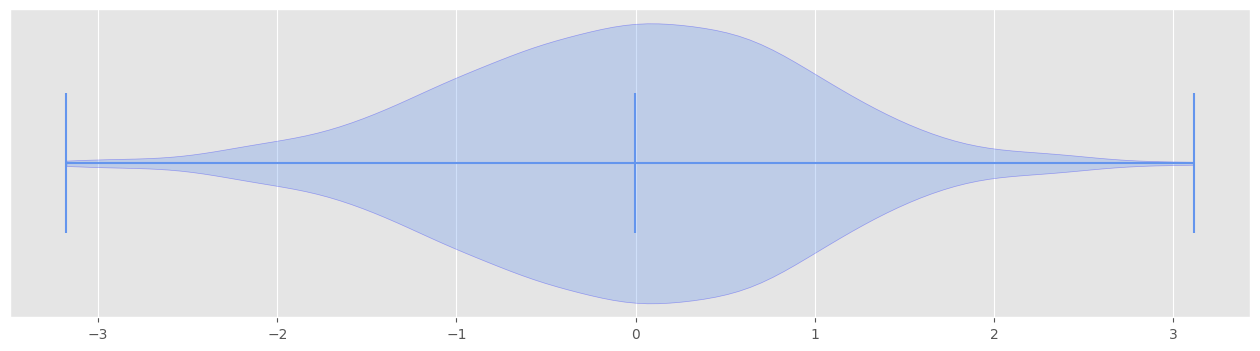

In [33]:
figure, axis = plt.subplots(figsize=(16, 4))
axis: plt.Axes

violin_parts = axis.violinplot(
    data,
    vert=False,
    showmedians=True,
)

for body in violin_parts["bodies"]:
    body.set_facecolor("cornflowerblue")
    body.set_edgecolor("blue")

for part in violin_parts:
    if part == "bodies":
        continue

    violin_parts[part].set_edgecolor("cornflowerblue")

axis.set_yticks([])
plt.show()

## Сложные конфигурации множественных графиков.

На прошлом занятии мы рассмотрели функцию `plt.subplots` для получения сетки координатных осей и построения нескольких графиков в рамках одного объекта `plt.Figure`. `subplots` является полезной функцией, однако обладает одним недостатком - все координатные оси, полученные с помощью `subplots`, имеют одинаковые размеры. В большинстве задача этого достаточно. Однако есть ряд задач, в которых мы бы хотели иметь координатные оси, связанные с одной фигурой, но имеющие разные размеры.

Подобный подход может быть полезен для построения нескольких типов диаграмм на одном объекте `plt.Figure`: диаграммы рассеяния, как основной формы визуализации данных, и гистограмм, как дополнительных графиков распределения данных вдоль конкретных координатных осей. В этом случае справиться с поставленной задачей нам поможет функция `plt.GridSpec`, которая создает промежуточный объект для конфигурации неравных по форме координатных осей. Рассмотрим пример.

In [34]:
mean = [2, 3]
cov = [[1, 1], [1, 2]]
space = 0.2

abscissa, ordinates = np.random.multivariate_normal(mean, cov, size=1000).T

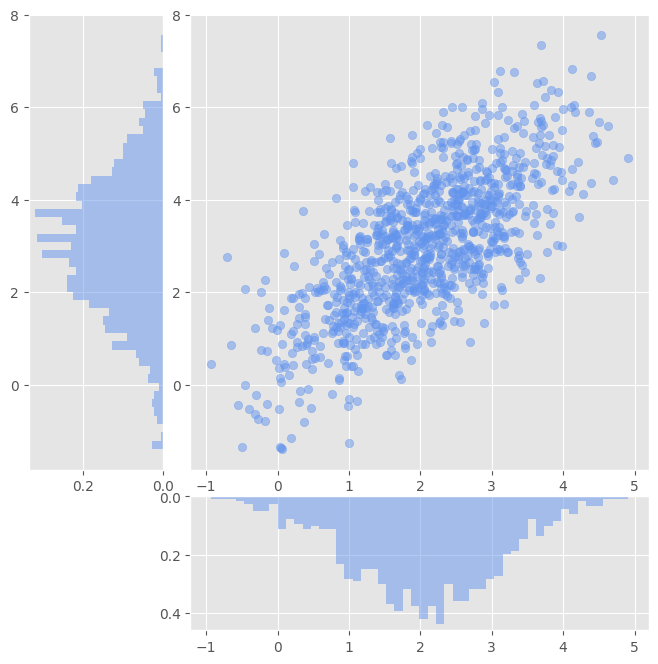

In [35]:
figure = plt.figure(figsize=(8, 8))
grid = plt.GridSpec(4, 4, wspace=space, hspace=space)

axis_scatter = figure.add_subplot(grid[:-1, 1:])
axis_hist_vert = figure.add_subplot(
    grid[:-1, 0],
    sharey=axis_scatter,
)
axis_hist_hor = figure.add_subplot(
    grid[-1, 1:],
    sharex=axis_scatter,
)

axis_scatter.scatter(abscissa, ordinates, color="cornflowerblue", alpha=0.5)
axis_hist_hor.hist(
    abscissa,
    bins=50,
    color="cornflowerblue",
    density=True,
    alpha=0.5,
)
axis_hist_vert.hist(
    ordinates,
    bins=50,
    color="cornflowerblue",
    orientation="horizontal",
    density=True,
    alpha=0.5,
)

axis_hist_hor.invert_yaxis()
axis_hist_vert.invert_xaxis()

plt.show()

## Задача 1. Распределения на любой вкус

Взяв за основу код предыдущего примера и код построения диаграммы с усиками и скрипичной диаграммы, реализуйте функцию `visualize_diagrams`, которая позволяет построить диаграмму рассеяния данных и распределения данных вдоль координатных осей.

*Входные данные*:
- `abscissa` - одномерный `np.ndarray` чисел с плавающей точкой - абсциссы визуализируемых точек.
- `ordinates` - одномерный `np.ndarray` чисел с плавающей точкой - ординаты визуализируемых точек.
-  `diagram_type` - строка, тип визуализации распределения данных вдоль осей. `diagram_type` должен принимать одно из трех значений: `hist` - в этом случае распределение строится в виде гистограммы, `violin` в этом случае распределение строится в виде скрипичной диаграммы, `box` - в этом случае распределение строится в виде ящика с усами.

*Сторонние эффекты*:
- После выполнения функции на экране должно отображаться изображение с визуализацией, похожей на визуализацию из последнего примера.
- Если размеры массивов `abscissa` и `ordinates` не равны, необходимо возбудить исключение `ShapeMismatchError`.
- Если значение `diagram_type` не является допустимым значением, необходимо возбудить `ValueError`.

**Требования**:

В данной задаче вам дана общая заготовка. Не считая этой заготовки, вы вольны решать задачу так, как считаете нужным. Однако при проверки ваших решений семинаристы будут уделять внимание следующим аспектам:

- **Правильность решения**. Важно, чтобы ваше решение работало так, как ожидается. Визуализация строится в соответствии с разобранными примерами. Реализованы все описанные сторонние эффекты.
- **Структура решения**. Решение должно быть аккуратным. Код должен быть разбит на логические блоки: функции или методы класса. Решение, реализованное в императивном стиле (все команды выполнены на уровне модуля) или в виде одной единственной функции будет оценено максимум в 5 баллов из 10. При разбиении кода на логические блоки избегайте смешения логики (вычисления и построение диаграмм в одной функции). Смешение логики также будет штрафоваться на усмотрение семинариста.
- **Оформление**. Оформляйте ваш код аккуратно. Используйте `flake8` вместе с конфигом из корня репозитория для проверки качества вашего кода. Также избегайте повторений. Если один и тот же код был скопирован и использован два раза, семинарист может снизить вашу оценку на свое усмотрение.

**Решение:**

In [30]:
from typing import Any

In [31]:
def visualize_diagrams(
    abscissa: np.ndarray,
    ordinates: np.ndarray,
    diagram_type: Any,
) -> None:
    # ваш код
    pass

**Тесты:**

In [32]:
mean = [2, 3]
cov = [[1, 1], [1, 2]]
space = 0.2

abscissa, ordinates = np.random.multivariate_normal(mean, cov, size=1000).T

In [33]:
visualize_diagrams(abscissa, ordinates, "hist")

## Задача 2. Сердечная задача

Представим, что вы работаете аналитиком данных в некоторой медицинской компании, которая занимается изготовлением кардио-имплантов. В данный момент кампания планирует запустить в серийное производство новый кардио-имплант, устанавливаемый при митральной недостаточности (неправильное функционирование митрального клапана сердца, при котором возникает обратное движение крови из левого желудочка в левое предсердие во время сокращения желудочков сердца вследствие неполного смыкания створок клапана). Прежде, чем запускать новую разработку в серийное производство было произведено исследования эффективности импланта. Исследование происходило следующим образом:
- У пациентов, принимающих участие в исследовании, фиксировалась текущая степень митральной недостаточности. Всего степеней митральное недостаточности 4: первая степень - самая легкая, четвертая - самая опасная.
- Затем участникам исследования устанавливался кардио-имплант.
- Спустя некоторое время повторно определялась степень митральной недостаточности.

Данные о степенях митральной недостаточности пациентов до и после установки импланта были записаны в файл [`medic_data.json`](./data/medic_data.json) в следующем формате:
```python
{
    "before": [
        "I",
        "II",
        ...
    ],
    "after": [
        "I",
        "II",
        ...
    ]
}
```

Ключу `"before"` соответствует список со степенями митральной недостаточности пациентов до установки импланта, а ключу `"after"` - после. Сами степени записаны в виде строковых литералов, которые стоит интерпретировать, как числа, записанные латинскими цифрами.

Ваша задача - реализовать функционал для визуализации распределения пациентов по степеням митральной недостаточности до и после установки импланта. Для этого вам необходимо прочитать данные из файла [`medic_data.json`](./data/medic_data.json), рассчитать число пациентов для каждой группы митральной недостаточности, построить столбчатые диаграммы, сохранить изображение с диаграммами в память компьютера.

В результате выполнения приведенной последовательности действий вы должны получить картинку, похожую на эту:
![expected-result](./images/task1_expected.png)

Проанализируйте, полученную вами диаграмму. Какой вывод об эффективности импланта можно сделать, если стадия I самая безопасная, а стадия IV - самая опасная?

**Требования**:

В данной задаче у вас нет заготовки решения. Вы вольны решать задачу так, как считаете нужным. Однако при проверки ваших решений семинаристы будут уделять внимание следующим аспектам:

- **Правильность решения**. Важно, чтобы ваше решение работало так, как ожидается. Решение должно включать считывание данных из файла, построение диаграммы на основе считанных данных, сохранение картинки в память компьютера. Неправильно работающие решения будут оценены в 0 баллов.
- **Структура решения**. Решение должно быть аккуратным. Код должен быть разбит на логические блоки: функции или методы класса. Решение, реализованное в императивном стиле (все команды выполнены на уровне модуля) будет оценено максимум в 5 баллов из 10. При разбиении кода на логические блоки избегайте смешения логики (вычисления и построение диаграмм в одной функции или чтение данных и построение диаграммы в одной функции). Смешение логики также будет штрафоваться на усмотрение семинариста.
- **Оформление**. Оформляйте ваш код аккуратно. Используйте `flake8` вместе с конфигом из корня репозитория для проверки качества вашего кода. Также избегайте повторений. Если один и тот же код был скопирован и использован два раза, семинарист может снизить вашу оценку на свое усмотрение.

**Решение**:

In [1]:
# ваш код

## Дополнительные материалы:
- [Построение donut-диаграмм с помощью plt.pie](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py);
- [Построение вложенных круговых диаграмм](https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py);
- [Двумерные гистограммы](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html);
- [Двумерные гистограммы в форме правильных шестиугольников](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html);